In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from Preprocessing import Preprocessing

In [2]:
pd.options.display.max_rows = 84

In [3]:
df_7200_healthy = pd.read_csv('../data/7200rpm_5kW_healthy_0.2s_0.05ms.csv')
df_7200_1turn_1rf = pd.read_csv('../data/7200rpm_5kW_1turn_1rf_0.2s_0.05ms.csv')
df_7200_1turn_001rf = pd.read_csv('../data/7200rpm_5kW_1turn_0.01rf_0.2s_0.05ms.csv')
df_7200_5turn_1rf = pd.read_csv('../data/7200rpm_5kW_5turns_1rf_0.2s_0.05ms.csv')
df_7200_5turn_001rf = pd.read_csv('../data/7200rpm_5kW_5turns_0.01rf_0.2s_0.05ms.csv')

In [4]:
preprocessed_healthy = Preprocessing(df_7200_healthy, 7200)
preprocessed_1turn_1rf = Preprocessing(df_7200_1turn_1rf, 7200)
preprocessed_1turn = Preprocessing(df_7200_1turn_001rf, 7200)
preprocessed_5turns_1rf = Preprocessing(df_7200_5turn_1rf, 7200)
preprocessed_5turns = Preprocessing(df_7200_5turn_001rf, 7200)

In [5]:
preprocessed_healthy.dataset
preprocessed_healthy.fundamental_total_sample_period(0.05)
preprocessed_healthy.nsc_augment()

preprocessed_1turn_1rf.dataset
preprocessed_1turn_1rf.fundamental_total_sample_period(0.05)
preprocessed_1turn_1rf.nsc_augment()

preprocessed_1turn.dataset
preprocessed_1turn.fundamental_total_sample_period(0.05)
preprocessed_1turn.nsc_augment()

preprocessed_5turns_1rf.dataset
preprocessed_5turns_1rf.fundamental_total_sample_period(0.05)
preprocessed_5turns_1rf.nsc_augment()

preprocessed_5turns.dataset
preprocessed_5turns.fundamental_total_sample_period(0.05)
preprocessed_5turns.nsc_augment()

d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(A)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 1].max()
d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(C)'][i: i + self.Ns] = self.dataset.iloc[i: i + self.Ns, 3].max()
d:\Programing\Python

,Time [ms],Current(PhaseA) [A],Current(PhaseB) [A],Current(PhaseC) [A],NSC
0,0.00,0.000000,0.000000,0.000000,14.376083
1,0.05,0.000013,0.614243,-0.614257,14.376083
2,0.10,0.000016,1.231591,-1.231607,14.376083
3,0.15,0.000018,1.848940,-1.848957,14.376083
4,0.20,0.000020,2.466288,-2.466308,14.376083
...,...,...,...,...,...
3997,199.85,28.898317,-19.528393,-9.369924,0.921193
3998,199.90,27.813073,-17.144977,-10.668097,0.921193
3999,199.95,26.646533,-13.972871,-12.673662,0.921193
4000,200.00,27.269883,-11.052771,-16.217112,0.921193


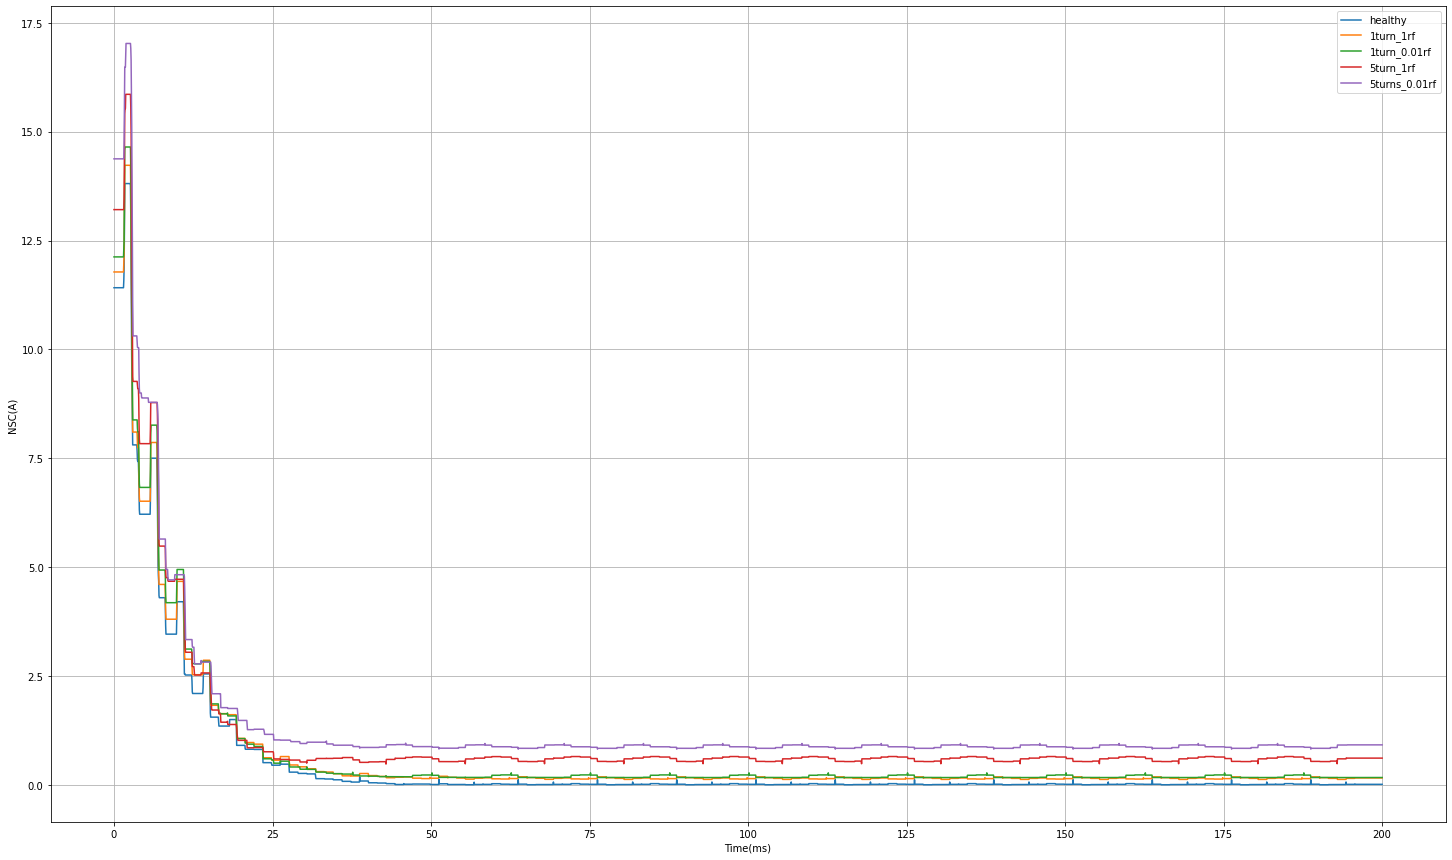

In [14]:
plt.figure(figsize=(25, 15))
plt.xlabel('Time(ms)')
plt.ylabel('NSC(A)')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_healthy.dataset['NSC'], label='healthy')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn_1rf.dataset['NSC'], label='1turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn.dataset['NSC'], label='1turn_0.01rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns_1rf.dataset['NSC'], label='5turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns.dataset['NSC'], label='5turns_0.01rf')
plt.legend()
plt.grid(True)

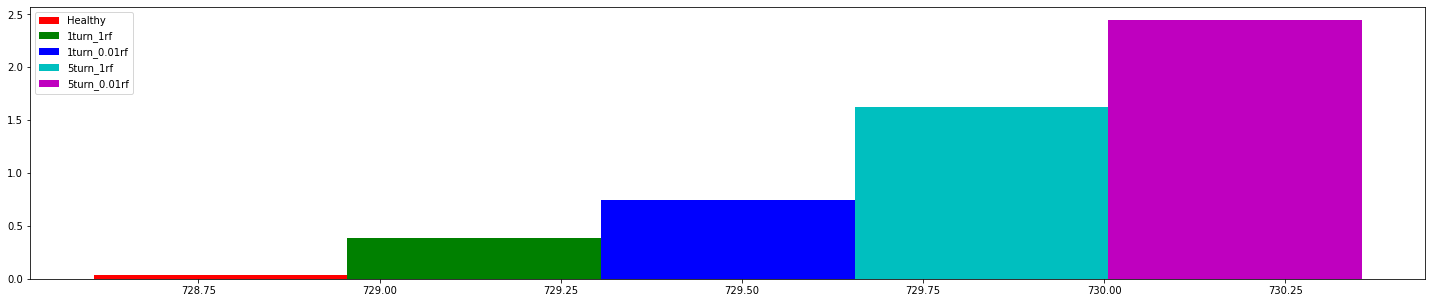

In [16]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseA) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseA) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseA) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseA) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseA) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
# plt.stem(x_f2[3], y_f2[3], markerfmt='>:k', label='1turn_1rf')
# plt.stem(x_f3[3], y_f3[3], markerfmt='*:b', label='1turn')
# plt.stem(x_f4[3], y_f4[3], markerfmt='P:m', label='5turns_1rf')
# plt.stem(x_f5[3], y_f5[3], markerfmt='x:g', label='5turns')
plt.legend()
plt.show()


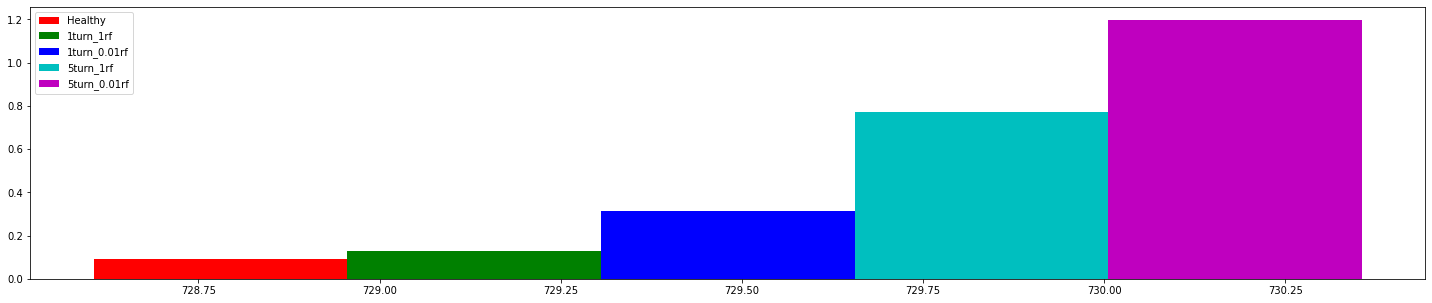

In [12]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseB) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseB) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseB) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseB) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseB) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

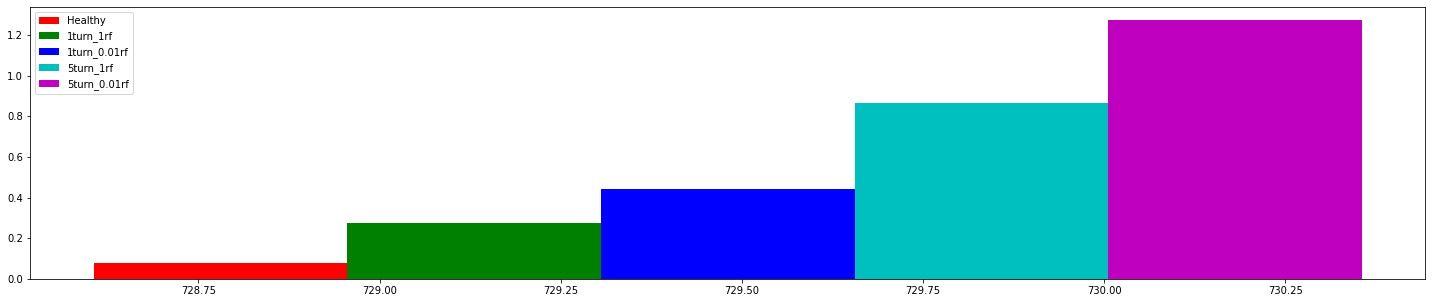

In [13]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseC) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseC) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseC) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseC) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseC) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()